# Présentation des données TP 3 SAE 15

In [6]:
from typing import Dict, List
import numpy as np 
import csv
from random import sample
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def csvToDict(f : str) -> Dict[str,np.ndarray]:
    """Fonction chargeant les données stockées dans le fichier f et retournant un dictionnaire où les clés sont les différents noms de fichiers décrits et les valeurs (taille en ko, timestamp) sont stockées dans un ndarray

    Args:
        f (str): Le nom du fichier à charger

    Returns:
        Dict[str,np.ndarray]: les clés sont les noms des fichiers observés et les valeurs un ndarray de dimension 2 [taille,timestamp]
    """
    ret : Dict[str, np.ndarray] = dict()
    c : str = ""
    with open(f, newline='') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in datareader:
            c = row[0]
            if c not in ret.keys():
                ret[c] = np.array([[int(row[1]), int(row[2])]])
            else:
                ret[c] = np.append(ret[c], [[int(row[1]), int(row[2])]],axis=0)
    return ret


def augmentationMoyenne(tab : np.ndarray) -> float:
    """[summary]

    Args:
        tab (np.ndarray): [description]

    Returns:
        float: [description]
    """
    #dernière taille observée - première / nombre d'observations
    augMoy : float = (tab[len(tab)-1][0] - tab[0][0]) / len(tab)
    return augMoy
    aug : float = 0
    lastS : float or None = None
    for i in tab:
        if lastS is None:
            lastS = i[0]
        else:
            aug = aug + (i[0] - lastS)
            lastS = i[0]
    return aug / (len(tab) - 1)


def plusGrandeAugmentation(tab : np.ndarray) -> (float,int):
    """[summary]

    Args:
        tab (np.ndarray): [description]

    Returns:
        float: [description]
    """
    maxaug : float = 0
    taug : int or None = None
    lastS : float or None = None
    for i in tab:
        if lastS is None:
            lastS = i[0]
        else:
            aug = (i[0] - lastS)
            if aug > maxaug:
                maxaug, taug =  aug, i[1]
            lastS = i[0]
    return (maxaug,taug)

def limiteAtteinte(tab : np.ndarray, limite : int) -> int or None:
    """[summary]

    Args:
        tab (np.ndarray): [description]

    Returns:
        int or None: [description]
    """
    res : int = None
    i : int = 0
    while i < len(tab) and tab[i][0] < limite:
        i = i + 1
    if i < len(tab):
        res = tab[i][1]
    return res

f = "donneesTP2_SAE15.csv"
res = csvToDict(f)


### Fonction permettant de calculer la répartition de la taille des fichiers au timestamp "nb"

In [7]:
def repartition(d: Dict[str, np.ndarray], nb: int) -> Dict[str, float]:
    """!
    @brief Calcule la répartition de la taille des fichiers à l'observation nb

    Paramètres : 
        @param d : Dict[str,np.ndarray] => les clés sont les noms de fichiers, les valeurs un ndarray de dimension 2
        @param nb : int => le timestamp
    Retour de la fonction : 
        @return Dict[str, float] => Les clés sont les noms des fichiers observés et la valeur un réel représentant en relatif la place prise par le fichier dans le répertoire

    """
    
    dico : Dict[str, np.ndarray] = {}
    l : List[int] = []
    for clef in d :
        i = 0
        while i < d[clef].shape[0]:
            if d[clef][i,1] == nb :
                l.append(d[clef][i,0])
                i = d[clef].shape[0]
            i += 1
    
    for i in range(len(l)):
        proportion : float = l[i] / sum(l)
        dico[list(d.keys())[i]] = proportion
    
    return dico

In [8]:
print(repartition(res, 1636974960))

{'/home/toto/Tmp/f1': 0.05, '/home/toto/Tmp/f2': 0.885, '/home/toto/Tmp/f3': 0.065}


### Procédure d'affichage des camemberts
#### Le premier camembert représente la répartition de la taille des fichiers lors de la première observation 
#### Le second camembert représente la répartition de la taille des fichiers lors de la dernière observation 

In [9]:
def affichageCamembert(d : Dict[str, np.ndarray]) :
    """!
    @brief Affiche 2 camemberts représentant la proportion des fichiers à la première observation et à la dernière

    Paramètres : 
        @param d : Dict[str,np.ndarray] => les clés sont les noms de fichiers, les valeurs un ndarray de dimension 2
    """
    
    #Premier camembert
    labels : List[str] = list(d.keys())
    sizes : List[float] = repartition(d, d[labels[0]][0,1]).values()
    colors : List[str] = sample(mcolors.CSS4_COLORS.keys(), len(sizes))
    plt.subplot(1,2,1)
    plt.pie(sizes, labels=labels, colors=colors)
    
    #Second camembert
    labels : List[str] = list(d.keys())
    sizes : List[float] = repartition(d, d[labels[0]][d[labels[0]].shape[0]-1,1]).values()
    colors : List[str] = sample(mcolors.CSS4_COLORS.keys(), len(sizes))
    plt.subplot(1,2,2)
    plt.pie(sizes, labels=labels, colors=colors)
    
    plt.show()

<ipython-input-9-39938b395f05>:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  colors : List[str] = sample(mcolors.CSS4_COLORS.keys(), len(sizes))
<ipython-input-9-39938b395f05>:19: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  colors : List[str] = sample(mcolors.CSS4_COLORS.keys(), len(sizes))


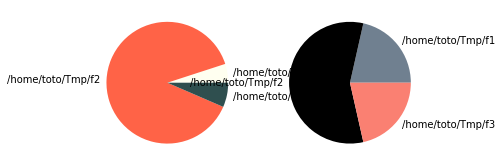

In [10]:
affichageCamembert(res)